<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Epid_T6_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Inciso (a)

\pi= 0.1877400562945059
\pi_2= 0.03813745154185253
E(Z)= 1.9018450496723254
Var(Z)= 2.31536163140359
(Mean-2*SD,Mean+2*SD)=(-1.141417430892629,4.94510753023728)


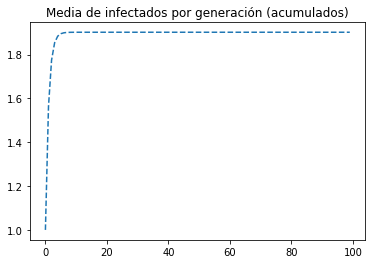

In [79]:
N=100000
R=0.2
log_norm_obs=np.random.lognormal(mean=0,sigma=np.sqrt(0.1),size=N)
f_log_norm_obs=1-np.e**(-R*log_norm_obs)
pii=np.mean(f_log_norm_obs)
pii2=np.mean(f_log_norm_obs**2)
print("\pi=",pii)
print("\pi_2=",pii2)
m_1=1+(3*pii/(1-2*pii))
print("E(Z)=",m_1)
var_K_T=6*pii2-(3*pii)**2+3*pii
v_1=((1/(1-2*pii))**2)*(var_K_T+var_K_T*pii*3/(1-2*pii))
print("Var(Z)=",v_1)
print("(Mean-2*SD,Mean+2*SD)=("+str(m_1-2*np.sqrt(v_1))+','+str(m_1+2*np.sqrt(v_1))+')')
def mean_n(n):
    sum=1
    if n>0:
        for i in range(n):#Hasta n-1
            sum+=3*pii*(pii*2)**(i)
    return sum
plt.plot([mean_n(n) for n in range(100)],'--',)
plt.title('Media de infectados por generación (acumulados)')
plt.show()

# Inciso (b)

\pi= 0.18779052080544545
\pi_2= 0.038130187429146145
E(Z)= 2.2902768439318315
Var(Z)= 7.077731018405586
(Mean-2*SD,Mean+2*SD)=(-3.0305242304950584,7.611077918358721)


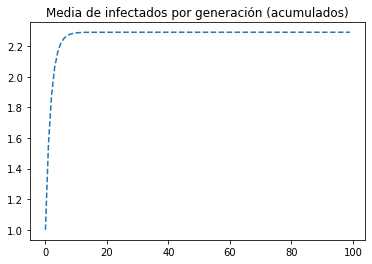

In [78]:
N=100000
R=0.2
log_norm_obs=np.random.lognormal(mean=0,sigma=np.sqrt(0.1),size=N)
f_log_norm_obs=1-np.e**(-R*log_norm_obs)
pii=np.mean(f_log_norm_obs)
pii2=np.mean(f_log_norm_obs**2)
print("\pi=",pii)
print("\pi_2=",pii2)
m_1=1+(3*pii/(1-3*pii))
print("E(Z)=",m_1)
var_K_T=9*pii2-(3*pii)**2+3*pii
v_1=((1/(1-3*pii))**2)*(var_K_T+var_K_T*pii*3/(1-3*pii))
print("Var(Z)=",v_1)
print("(Mean-2*SD,Mean+2*SD)=("+str(m_1-2*np.sqrt(v_1))+','+str(m_1+2*np.sqrt(v_1))+')')
def mean_n(n):
    sum=1
    if n>0:
        for i in range(n):#Hasta n-1
            sum+=(pii*k)**(1+i)
    return sum
plt.plot([mean_n(n) for n in range(100)],'--',)
plt.title('Media de infectados por generación (acumulados)')
plt.show()

# Ejercicio 2

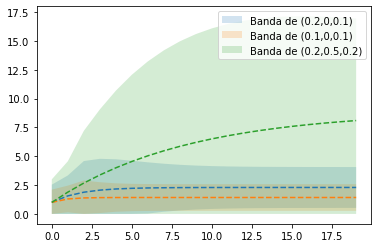

In [62]:
k=3#Media de los grados
M=20
for R,mu,sigma2 in [[0.2,0,0.1],[0.1,0,0.1],[0.2,0.5,0.2],[0.3,0.7,0.2]]:#Configuraciones de parámetros.
    N=100000
    log_norm_obs=np.random.lognormal(mean=mu,sigma=np.sqrt(sigma2),size=N)
    f_log_norm_obs=1-np.e**(-R*log_norm_obs)
    pii=np.mean(f_log_norm_obs)
    pii2=np.mean(f_log_norm_obs**2)
    def mean_n(n):
        sum=1
        if n>0:
            for i in range(n):#Hasta n-1
                sum+=(pii*k)**(1+i)
        return sum
    def var_n(n):
        G_K_2p_1=k**2
        sum=pii2*(k**2)+k*pii-(k*pii)**2
        if n>0:
            sum+=((k)**2)*pii2*pii*k
        if n>1:
            for i in range(n):
                sum+=G_K_2p_1*pii2*(pii*k)**(2*n-2)+G_K_2p_1*pii2*(pii*k)**(n-1)*(mean_n(n-2))+(pii*k)**n-(pii*k)**(2*n)
        return sum
    def var_lim():
        var_KT=(k**2)*pii2-(k*pii)**2+k*pii
        return ((1/(1-pii*k))**2)*(var_KT+(1/(1-pii*k))*var_KT*pii*k)
    if R==0.3:
        continue
        #plt.plot([mean_n(n) for n in range(M)],'--',label='Media de ('+str(R)+','+str(mu)+','+str(sigma2)+')')
    else: 
        plt.plot([mean_n(n) for n in range(M)],'--',)
        plt.fill_between(range(M),[np.maximum(0,mean_n(n)-2*np.sqrt(var_n(n))) for n in range(M)],[mean_n(n)+2*np.sqrt(var_n(n)) for n in range(M)],alpha=0.2,label='Banda de ('+str(R)+','+str(mu)+','+str(sigma2)+')')
plt.legend()
plt.show()